In [464]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [465]:
df = pd.read_csv("multiclass.csv")

In [466]:
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


**24Seven** is a retail chain, which has different stores buying various products. Based on the purchase history we want to divide the stores into classes for better inventory management and customer handling.

**Data Description:**


| Id | Features | Description |
| :-- | :--| :--|
|01| **Region** | Region of the store (1: Less purchase 2: frequent purchase 3: high purchase|
|02| **Fresh** | How many fresh items are brought |
|03|**Milk**| How many units of Milk is purchased |
|04|**Grocery**|Units of Grocery bought for the store |
|05|**Frozen**|Frozen items purchased |
|06|**Detergents_Paper**|Unit of Detergents and paper bought |
|07|**Delicassen**|Food related items |
|08|**class**| Type/Category of the Store (1 ,2 , 3)|

In [467]:
df.shape

(440, 8)

In [468]:
df.isnull().sum()

Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
class               0
dtype: int64

In [469]:
df.describe()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,2.195455
std,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,0.744289
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,1.000000
25%,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,2.000000
50%,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,2.000000
75%,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,3.000000
max,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,3.000000


In [470]:
# Check unique Regions and their counts
df['Region'].value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

In [471]:
# Check unique classes and their counts
df['class'].value_counts()

class
2    180
3    173
1     87
Name: count, dtype: int64

**One-Hot Encode Regions and class** as both are **Categorical data**

In [472]:
region_col = df[['Region']]

# Initialize and apply encoder
encoder = OneHotEncoder(sparse_output=False)
region_encoded = encoder.fit_transform(region_col)

# Get column names and create a DataFrame
region_feature_names = encoder.get_feature_names_out(['Region'])
region_df = pd.DataFrame(region_encoded, columns=region_feature_names)

# Concatenate with original data
df = pd.concat([df.drop('Region', axis=1), region_df], axis=1)

class_col = df[['class']]

# Initialize and apply encoder
encoder = OneHotEncoder(sparse_output=False)
class_encoded = encoder.fit_transform(class_col)

# Get column names and create a DataFrame
class_feature_names = encoder.get_feature_names_out(['class'])
class_df = pd.DataFrame(class_encoded, columns=class_feature_names)

# Concatenate with original data
df = pd.concat([df.drop('class', axis=1), class_df], axis=1)

In [473]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,class_1,class_2,class_3
0,12669,9656,7561,214,2674,1338,0.0,0.0,1.0,0.0,1.0,0.0
1,7057,9810,9568,1762,3293,1776,0.0,0.0,1.0,0.0,1.0,0.0
2,6353,8808,7684,2405,3516,7844,0.0,0.0,1.0,0.0,1.0,0.0
3,13265,1196,4221,6404,507,1788,0.0,0.0,1.0,1.0,0.0,0.0
4,22615,5410,7198,3915,1777,5185,0.0,0.0,1.0,1.0,0.0,0.0


In [474]:
X = df.drop(columns=['class_1','class_2','class_3'])
y = df[['class_1','class_2','class_3']]

**Visualizing the data using PCA**

In [475]:
from sklearn.decomposition import PCA

# reducing features to just 2 features
pca = PCA(n_components=2)
visual_1 = pca.fit_transform(X)
visual_1.shape

(440, 2)

[0.45961362 0.40517227]


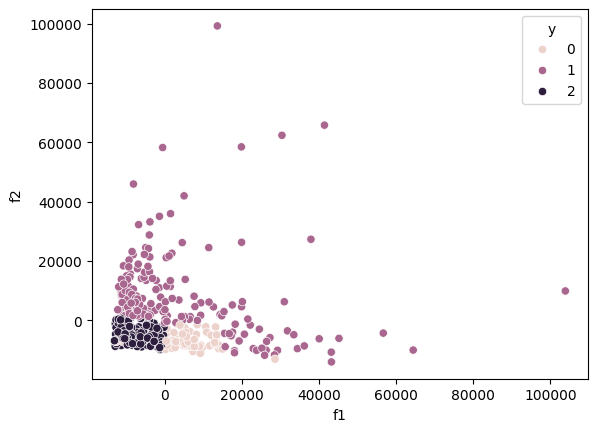

In [476]:
df2 = pd.DataFrame(visual_1, columns=['f1', 'f2'])
df2['y'] = np.argmax(y.values, axis=1)  # converts: [1, 0, 0] → 0 (class 1), [0, 1, 0] → 1 (class 2), [0, 0, 1] → 2 (class 3)
print(pca.explained_variance_ratio_)
sns.scatterplot(data= df2, x= 'f1',y = 'f2' , hue = 'y')
plt.show()

**Observation**

Data is not linearly separable. Hence, best strategy would be to use Deep Neural Network

**Splitting Data into Train, Validation and Test Data**

In [477]:
from sklearn.model_selection import train_test_split

# 90% Train+Val → X_train_val, y_train_val # 10% Test set → X_test, y_test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42) 

# 90% Train → X_train, y_train (i.e., 81% of original data) # 10% Validation → X_val, y_val (i.e., 9% of original data)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (356, 9) (356, 3)
Validation: (40, 9) (40, 3)
Test  :  (44, 9) (44, 3)


**Standardizing the data**

Standardization rescales all features so that they have:

* Mean = 0
* Standard deviation = 1

This helps:

* Speed up model convergence
* Avoid domination by features with larger scales
* Improve performance for models like neural networks

In [478]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [479]:
np.mean(X_train, axis=0)

array([ 5.98771968e-17,  1.24744160e-17, -4.98976640e-18,  1.99590656e-17,
        1.49692992e-17,  1.74641824e-17,  2.49488320e-17,  1.49692992e-17,
        1.19754394e-16])

In [480]:
# Above values are close to 0

In [481]:
np.std(X_train, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Why fit_transform on X_train and only transform on X_val / X_test?

--> Because on X_train, we learn and apply scaling.
X_val & X_test - Reuse training mean/std

**We can create 7 layers NN**

<img src="images/nn_7layers.png">

**Layers Description:**


| Layer | Descrption |
| :-- | :--|
| **L1** | Input Layer|
| **L2** | Contains 32 Neurons|
|**L3** |Contains 64 Neurons|
|**L4** |Contains 128 Neurons|
|**L5** |Contains 64 Neurons |
|**L6** |Contains 32 Neurons|
|**L7** |Output Layer |

<br>

**Note:** In Between the layers, we will use:
- ReLU as the Activation function

In [482]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Define the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Input + L2
    Dense(64, activation='relu'),                                   # L3
    Dense(128, activation='relu'),                                  # L4
    Dense(64, activation='relu'),                                   # L5
    Dense(32, activation='relu'),                                   # L6
    Dense(3, activation='softmax')                                  # L7 (Output)
])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**SGD (No Momentum)**

In [483]:
# Compile with plain SGD (no momentum)
model.compile(
    optimizer=SGD(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [484]:
history_sgd = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32
)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2156 - loss: 1.1143 - val_accuracy: 0.3750 - val_loss: 1.0958
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4212 - loss: 1.0931 - val_accuracy: 0.5750 - val_loss: 1.0713
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5036 - loss: 1.0720 - val_accuracy: 0.6500 - val_loss: 1.0511
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5741 - loss: 1.0563 - val_accuracy: 0.6500 - val_loss: 1.0334
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5567 - loss: 1.0371 - val_accuracy: 0.6250 - val_loss: 1.0156
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5308 - loss: 1.0357 - val_accuracy: 0.6250 - val_loss: 0.9937
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5618 - loss: 1.0076 - val_accuracy: 0.6750 - val_loss: 0.9761
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5624 - loss: 0.9919 - val_accuracy: 0.7250 - val_loss:

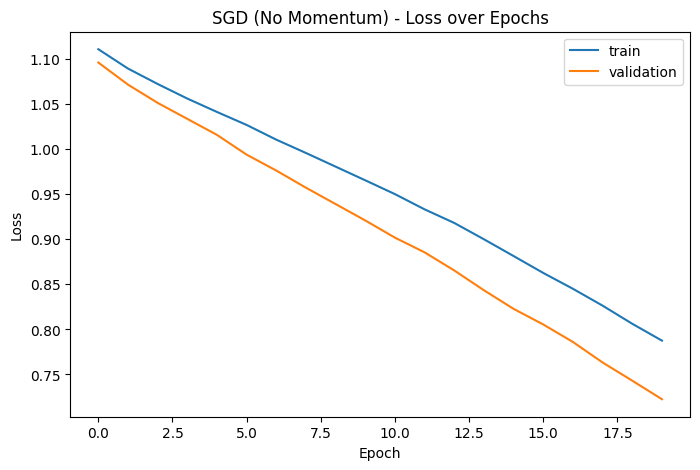

In [485]:
# Plot training and validation loss
plt.figure(figsize=(8, 5))

epochs = history_sgd.epoch
loss = history_sgd.history["loss"]
val_loss = history_sgd.history["val_loss"]

plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.title('SGD (No Momentum) - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Observation**

* Slow convergence, but stable.
* No overfitting or underfitting, but also not the fastest optimizer.
* Suitable when stability is preferred over speed.

**SGD + Momentum**

In [486]:
# Compile with SGD + momentum
model.compile(
    optimizer=SGD(momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [487]:
history_momentum = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32
)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7525 - loss: 0.7618 - val_accuracy: 0.7750 - val_loss: 0.6255
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7634 - loss: 0.6501 - val_accuracy: 0.8250 - val_loss: 0.4826
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7574 - loss: 0.5539 - val_accuracy: 0.8500 - val_loss: 0.3969
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8144 - loss: 0.4288 - val_accuracy: 0.9000 - val_loss: 0.3317
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8526 - loss: 0.3958 - val_accuracy: 0.9000 - val_loss: 0.3290
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8824 - loss: 0.3075 - val_accuracy: 0.9000 - val_loss: 0.3280
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9071 - loss: 0.2832 - val_accuracy: 0.9250 - val_loss: 0.2620
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9167 - loss: 0.2626 - val_accuracy: 0.9250 - val_loss:

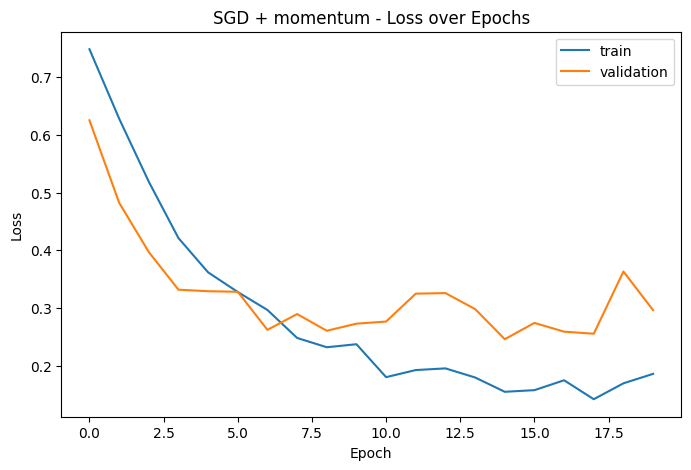

In [488]:
# Plot training and validation loss
plt.figure(figsize=(8, 5))

epochs = history_momentum.epoch
loss = history_momentum.history["loss"]
val_loss = history_momentum.history["val_loss"]

plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.title('SGD + momentum - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Observation**

* Momentum boosts convergence speed — reaches low loss much quicker than plain SGD.
* Mild overfitting signs (train loss drops while val loss bounces).
* Needs careful tuning of learning rate and momentum hyperparameters to stabilize.

**Adagrad**

In [489]:
from tensorflow.keras.optimizers import Adagrad

# Compile with Adagrad
model.compile(
    optimizer=Adagrad(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [490]:
history_adagrad = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32
)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9798 - loss: 0.1207 - val_accuracy: 0.9000 - val_loss: 0.2803
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9693 - loss: 0.1457 - val_accuracy: 0.9000 - val_loss: 0.2705
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9653 - loss: 0.1329 - val_accuracy: 0.9000 - val_loss: 0.2657
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9752 - loss: 0.1308 - val_accuracy: 0.9000 - val_loss: 0.2613
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9717 - loss: 0.1431 - val_accuracy: 0.9000 - val_loss: 0.2583
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9762 - loss: 0.1047 - val_accuracy: 0.9000 - val_loss: 0.2536
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9645 - loss: 0.1544 - val_accuracy: 0.9000 - val_loss: 0.2531
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9579 - loss: 0.1705 - val_accuracy: 0.9000 - val_loss:

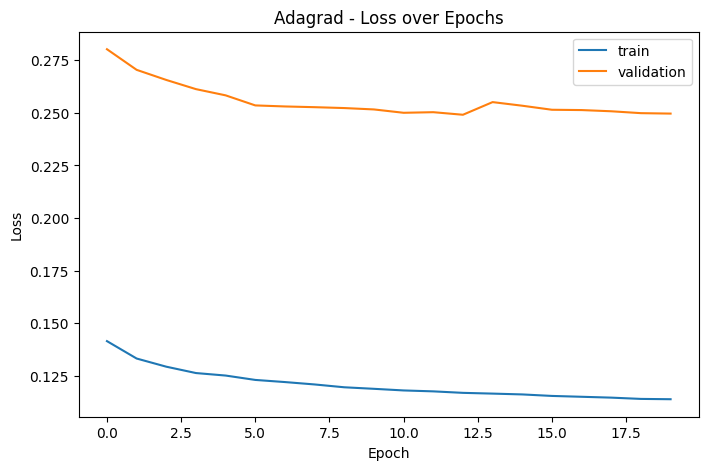

In [491]:
# Plot training and validation loss
plt.figure(figsize=(8, 5))

epochs = history_adagrad.epoch
loss = history_adagrad.history["loss"]
val_loss = history_adagrad.history["val_loss"]

plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.title('Adagrad - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Observation**

* Converges fast initially, but the adaptive learning rate shrinks too much over time, causing learning to nearly halt.
* Good early performance, but may underfit in longer runs.

**RMSProp**

In [492]:
from tensorflow.keras.optimizers import RMSprop

# Compile with RMSprop
model.compile(
    optimizer=RMSprop(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [493]:
history_rmsprop = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32
)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9637 - loss: 0.1654 - val_accuracy: 0.8750 - val_loss: 0.3047
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9608 - loss: 0.1489 - val_accuracy: 0.9000 - val_loss: 0.2736
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9607 - loss: 0.1507 - val_accuracy: 0.9250 - val_loss: 0.2612
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9710 - loss: 0.1341 - val_accuracy: 0.8500 - val_loss: 0.3590
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9726 - loss: 0.0968 - val_accuracy: 0.8750 - val_loss: 0.3137
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9626 - loss: 0.1180 - val_accuracy: 0.9250 - val_loss: 0.2655
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9832 - loss: 0.0677 - val_accuracy: 0.9250 - val_loss: 0.2787
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9586 - loss: 0.1313 - val_accuracy: 0.9250 - val_loss:

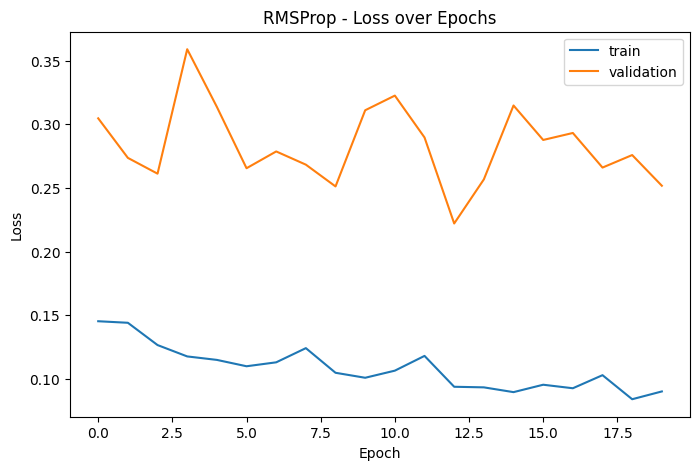

In [494]:
# Plot training and validation loss
plt.figure(figsize=(8, 5))

epochs = history_rmsprop.epoch
loss = history_rmsprop.history["loss"]
val_loss = history_rmsprop.history["val_loss"]

plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.title('RMSProp - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Observation**

* RMSProp learns quickly but is sensitive to noisy gradients, leading to oscillating validation performance.
* High variance in validation loss could indicate that RMSProp may require better tuning.

**Adam**

In [495]:
from tensorflow.keras.optimizers import Adam

# Compile with Adam
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [496]:
history_adam = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32
)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9690 - loss: 0.1078 - val_accuracy: 0.9000 - val_loss: 0.3860
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9736 - loss: 0.1125 - val_accuracy: 0.9250 - val_loss: 0.3015
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9914 - loss: 0.0454 - val_accuracy: 0.9000 - val_loss: 0.3290
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9734 - loss: 0.0859 - val_accuracy: 0.9250 - val_loss: 0.3439
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9841 - loss: 0.0555 - val_accuracy: 0.9250 - val_loss: 0.3548
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9822 - loss: 0.0630 - val_accuracy: 0.9000 - val_loss: 0.4126
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9827 - loss: 0.0610 - val_accuracy: 0.9250 - val_loss: 0.3469
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9858 - loss: 0.0528 - val_accuracy: 0.9000 - val_loss

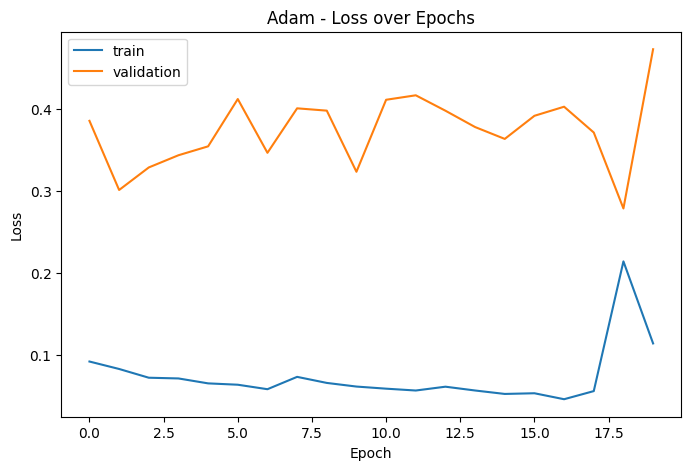

In [497]:
# Plot training and validation loss
plt.figure(figsize=(8, 5))

epochs = history_adam.epoch
loss = history_adam.history["loss"]
val_loss = history_adam.history["val_loss"]

plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.title('Adam - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Observation**

* Adam shows fast convergence on training data but lacks generalization to validation data.
* Likely overfitting — large gap between training and validation loss.
* Final spikes in loss suggest potential instability or sensitivity to learning rate in later stages.

**Training Loss Comparison Across Optimizers**

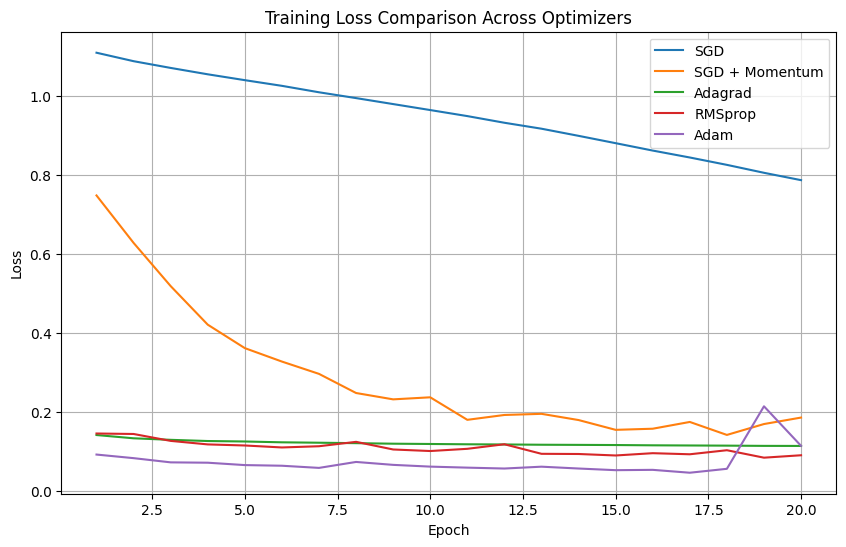

In [498]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 6))

# Epochs (same for all histories)
epochs = range(1, len(history_sgd.history['loss']) + 1)

# Plot training loss for each optimizer
plt.plot(epochs, history_sgd.history['loss'], label='SGD')
plt.plot(epochs, history_momentum.history['loss'], label='SGD + Momentum')
plt.plot(epochs, history_adagrad.history['loss'], label='Adagrad')
plt.plot(epochs, history_rmsprop.history['loss'], label='RMSprop')
plt.plot(epochs, history_adam.history['loss'], label='Adam')

plt.title('Training Loss Comparison Across Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

**Validation Loss Comparison Across Optimizers**

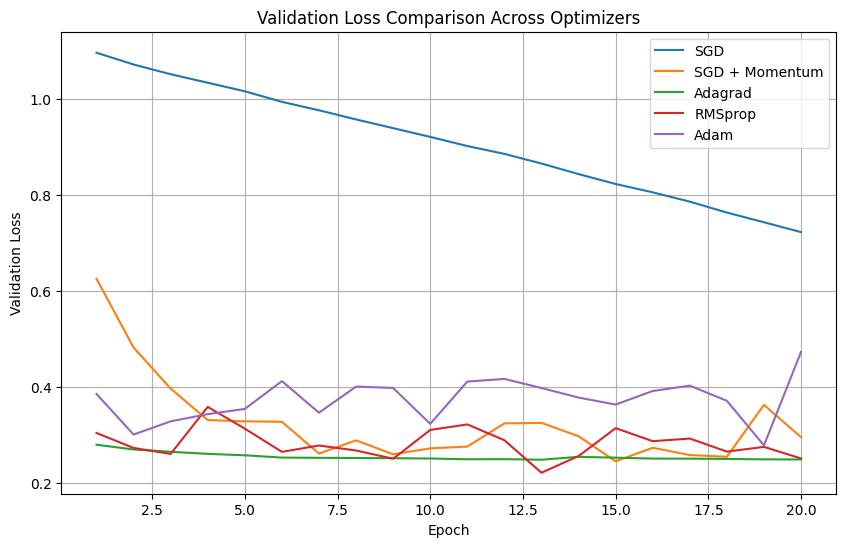

In [499]:
plt.figure(figsize=(10, 6))

plt.plot(epochs, history_sgd.history['val_loss'], label='SGD')
plt.plot(epochs, history_momentum.history['val_loss'], label='SGD + Momentum')
plt.plot(epochs, history_adagrad.history['val_loss'], label='Adagrad')
plt.plot(epochs, history_rmsprop.history['val_loss'], label='RMSprop')
plt.plot(epochs, history_adam.history['val_loss'], label='Adam')

plt.title('Validation Loss Comparison Across Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


## 🔍 Optimizer Comparison Summary

This project compares the performance of several popular optimizers on a classification task. The training and validation metrics were observed over 20 epochs.

---

### 🧪 Optimizers Evaluated

#### 1. **SGD (No Momentum)**
- 🐌 Training loss decreases slowly and inconsistently.
- 📉 Validation loss improves slightly but remains high.
- ❌ **Conclusion:** Very slow convergence, prone to getting stuck. Least effective.

#### 2. **SGD + Momentum**
- 🚀 Faster and smoother training loss reduction.
- 📈 Validation accuracy improves steadily.
- ⚠️ Slight overfitting after peak performance.
- ✅ **Conclusion:** Best balance of stability and generalization.

#### 3. **Adagrad**
- ⚡ Quick performance gains in early epochs.
- 🔄 Validation loss plateaus early due to aggressive learning rate decay.
- ❌ **Conclusion:** Good starter, but underfits with time. Suitable for sparse data or early convergence.

#### 4. **RMSProp**
- 📉 Steady decrease in training loss.
- ⚠️ Validation loss fluctuates heavily.
- ❌ **Conclusion:** Sensitive to hyperparameters. Unstable generalization in this setup.

#### 5. **Adam**
- ⚡ Very fast training loss reduction.
- ⚠️ Validation loss highly erratic; overfitting observed.
- 🔄 Spikes in loss toward the end.
- ❌ **Conclusion:** Overfits quickly. Needs careful tuning or regularization.

---

### 📊 Summary Table

| Optimizer        | Training Convergence | Validation Stability | Generalization       |
|------------------|----------------------|-----------------------|------------------------|
| **SGD**              | ❌ Slow               | ⚠️ Flat                | ❌ Poor                |
| **SGD + Momentum**   | ✅ Stable             | ⚠️ Slight overfit      | ✅ Good                |
| **Adagrad**          | ✅ Fast (early)       | ⚠️ Plateaus early      | ❌ Underfits (later)   |
| **RMSProp**          | ✅ Good               | ❌ Highly unstable     | ❌ Inconsistent         |
| **Adam**             | ✅ Very fast          | ❌ Very unstable       | ❌ Overfits / erratic   |

---

### 🏁 Final Insight

- 🏆 **Best Overall**: **SGD + Momentum** — stable, generalizes well.
- 🛠️ **Use With Tuning**: **Adam**, **RMSProp** — strong learners but need regularization.
- ⚠️ **Avoid for long runs**: **Adagrad** — can underfit after early performance.
- 🐢 **Baseline Only**: **SGD** — too slow and inefficient without momentum.

---
